In [ ]:
%tensorflow_version 2.x

import datetime
import joblib
import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import time

from numpy import expand_dims, ones, zeros, loadtxt, savetxt
from numpy.random import rand, randint

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM, Conv2D, LeakyReLU, Reshape, Conv2DTranspose, AveragePooling2D, Conv3D
from keras.preprocessing.image import load_img, img_to_array, array_to_img, save_img
from keras.utils.vis_utils import plot_model
tf.config.run_functions_eagerly(True)

from skimage.io import imsave, imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

### Classificador de cores

[185 248  11]


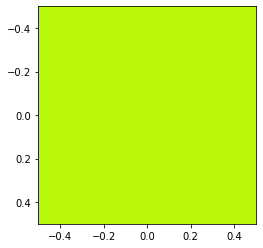

In [ ]:
x = np.array([round(i) for i in np.random.uniform(-0.5,255.5,3)])
print(x)
x = x.reshape(1,1,3)
plt.imshow(x)

In [ ]:
dir = 'drive/MyDrive/Colab Notebooks/Keith Haring/'
print(os.listdir(dir))

['color_classifier.pkl', 'cores_classificadas.csv', 'Arte', 'color_profiles.csv', 'is_done.txt', 'Arte resized', 'discriminator.h5', 'generator.h5', 'gan.h5']


In [ ]:
cores = ['Branco', 'Preto','Cinzento','Castanho','Vermelho', 'Laranja','Amarelo','Verde','Azul','Roxo','Rosa']
cores2 = dict()
for i, cor in enumerate(cores):
  cores2[cor] = i+1
print(cores2)

if 'cores_classificadas.csv' not in os.listdir('drive/MyDrive/Colab Notebooks/Keith Haring'):
  classificacao_cores = []
  n = 200
  for i in range(n):
    x = np.array([round(i) for i in np.random.uniform(-0.5,255.5,3)])
    print(x)
    x = x.reshape(1,1,3)
    plt.imshow(x)
    plt.show()
    print(cores2)
    cor = int(input(f'Cor {i+1}/{n}: '))
    classificacao_cores.append(list(x.flatten())+[cor])
  print(classificacao_cores)
else:
  classificacao_cores = np.loadtxt('drive/My Drive/Colab Notebooks/Keith Haring/cores_classificadas.csv',delimiter=';',dtype=int)

{'Branco': 1, 'Preto': 2, 'Cinzento': 3, 'Castanho': 4, 'Vermelho': 5, 'Laranja': 6, 'Amarelo': 7, 'Verde': 8, 'Azul': 9, 'Roxo': 10, 'Rosa': 11}


In [ ]:
if 'cores_classificadas.csv' not in os.listdir('drive/MyDrive/Colab Notebooks/Keith Haring'):
  n = 10
  for i in range(n):
    x = np.array([np.random.choice([255,255,255,254,253,252]) for i in range(3)])
    print(x)
    x = x.reshape(1,1,3)
    plt.imshow(x)
    plt.show()
    print(cores2)
    cor = int(input(f'Cor {i+1}/{n}: '))
    classificacao_cores.append(list(x.flatten())+[cor])
  for i in range(n):
    x = np.array([np.random.choice([0,0,0,1,2,3]) for i in range(3)])
    print(x)
    x = x.reshape(1,1,3)
    plt.imshow(x)
    plt.show()
    print(cores2)
    cor = int(input(f'Cor {i+1}/{n}: '))
    classificacao_cores.append(list(x.flatten())+[cor])
  print(classificacao_cores)
  classificacao_cores = np.array(classificacao_cores)
else:
  pass

In [ ]:
if 'cores_classificadas.csv' not in os.listdir('drive/MyDrive/Colab Notebooks/Keith Haring'):
  classificacao_cores = list(classificacao_cores)
  pintura = load_img('drive/MyDrive/Colab Notebooks/Keith Haring/Arte/13.PNG')
  pintura = img_to_array(pintura)
  height, width = pintura.shape[:-1]
  for n in range(40):
    i = np.random.choice(range(height))
    j = np.random.choice(range(width))
    pixel = pintura[i,j,:]
    pixel = np.array([int(i) for i in pixel])
    pixel = pixel.reshape(1,1,3)
    print(pixel)
    plt.imshow(pixel)
    plt.show()
    print(cores2)
    cor = int(input(f'Cor {n+1}/{50}: '))
    classificacao_cores.append(list(x.flatten())+[cor])
  classificacao_cores = np.array(classificacao_cores)
  np.savetxt('drive/My Drive/Colab Notebooks/Keith Haring/cores_classificadas.csv',classificacao_cores,delimiter=';', fmt='%i')
else:
  pass

In [ ]:
if 'color_classifier.pkl' not in os.listdir('drive/MyDrive/Colab Notebooks/Keith Haring'):
  classificacao_cores = np.loadtxt('drive/My Drive/Colab Notebooks/Keith Haring/cores_classificadas.csv', delimiter=';')
  x = classificacao_cores[:,:3]
  y = classificacao_cores[:,3]

  clr_classifier = RandomForestClassifier(n_estimators = 150, max_depth=10, random_state=0)
  clr_classifier.fit(x, y)
  joblib.dump(clr_classifier, 'drive/My Drive/Colab Notebooks/Keith Haring/color_classifier.pkl')
else:
  clr_classifier = joblib.load('drive/My Drive/Colab Notebooks/Keith Haring/color_classifier.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [ ]:
def classify_color(x):
  value = clr_classifier.predict([x])
  return round(value[0])

[111 116 129]


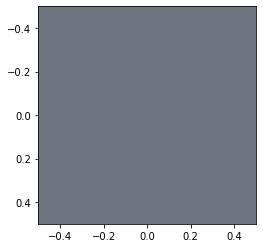

9 AZUL
[ 21 149  33]


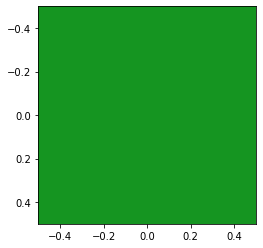

8 VERDE
[ 54 113 200]


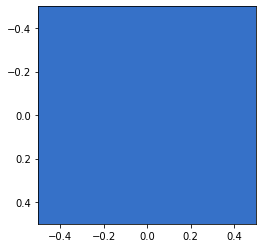

9 AZUL
[179 205 161]


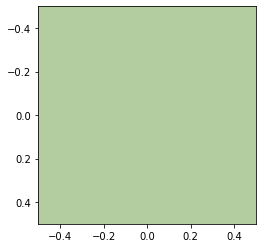

8 VERDE
[ 37 174  68]


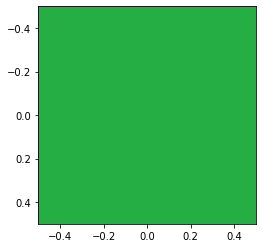

8 VERDE


In [ ]:
n = 5
for i in range(n):
  x = np.array([round(i) for i in np.random.uniform(-0.5,255.5,3)])
  print(x)
  x = x.reshape(1,1,3)
  plt.imshow(x)
  plt.show()
  x = x.reshape(1,3)
  cor_prevista = round(clr_classifier.predict(x)[0])
  print(cor_prevista, cores[cor_prevista-1].upper())

In [ ]:
print(cores)

['Branco', 'Preto', 'Cinzento', 'Castanho', 'Vermelho', 'Laranja', 'Amarelo', 'Verde', 'Azul', 'Roxo', 'Rosa']


### Caraterização das imagens quanto às cores presentes

In [ ]:
#is_done = []
is_done = list(np.loadtxt('drive/MyDrive/Colab Notebooks/Keith Haring/color_profiles.csv', dtype = str, delimiter=';').T[0])
for paint_name in os.listdir('drive/MyDrive/Colab Notebooks/Keith Haring/Arte'):
  if paint_name not in is_done:
    print(paint_name, f'({len(is_done)+1}/632)')
    pintura = load_img(f'drive/MyDrive/Colab Notebooks/Keith Haring/Arte/{paint_name}')
    pintura = img_to_array(pintura)
    height, width = pintura.shape[:-1]
    cores_pintura = np.zeros(12)
    for n in range(5000):
      i = np.random.choice(range(height))
      j = np.random.choice(range(width))
      pixel = pintura[i,j,:]
      cor = classify_color(pixel)
      cores_pintura[cor] +=1

    f = open('./drive/MyDrive/Colab Notebooks/Keith Haring/color_profiles.csv','a+')
    s = f'{paint_name};'
    for i in range(1,12):
      s += f'{cores_pintura[i]};'
    s = s[:-1] + '\n'
    f.write(s)
    f.close()

    is_done.append(paint_name)
    np.savetxt('./drive/MyDrive/Colab Notebooks/Keith Haring/is_done.txt', is_done, delimiter=' ', fmt="%s")
print('Tudo feito!')

Tudo feito!


In [ ]:
image_profiles = np.loadtxt('drive/MyDrive/Colab Notebooks/Keith Haring/color_profiles.csv', dtype = str, delimiter=';')
image_names = image_profiles[:,0]
color_profiles = image_profiles[:,1:]
color_profiles = color_profiles.astype(float).astype(int)

### Agrupamento das imagens

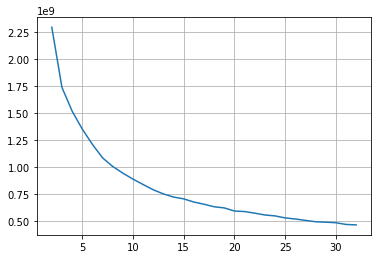

In [ ]:
dist_cluster_center = []
for n in range(2,33):
  kmeans = KMeans(n_clusters=n).fit(color_profiles)
  dist_cluster_center.append(kmeans.inertia_)

plt.plot(range(2,33), dist_cluster_center)
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=8).fit(color_profiles)
image_groups = kmeans.labels_

In [ ]:
indices = image_groups.argsort()

image_profiles[:,1:] = image_profiles[:,1:].astype(float).astype(int)
image_profiles = list(image_profiles.T)
image_profiles.append(image_groups)
image_profiles = np.array(image_profiles).T
image_profiles = image_profiles[indices]
image_profiles

array([['284.jpg', '1135', '839', ..., '35', '143', '0'],
       ['170.jpg', '87', '285', ..., '7', '69', '0'],
       ['359.jpg', '768', '1428', ..., '3', '0', '0'],
       ...,
       ['542.jpg', '227', '681', ..., '66', '342', '7'],
       ['85.jpg', '1', '163', ..., '18', '355', '7'],
       ['543.jpg', '55', '213', ..., '43', '169', '7']], dtype='<U11')

### Associação de latent vectors às imagens

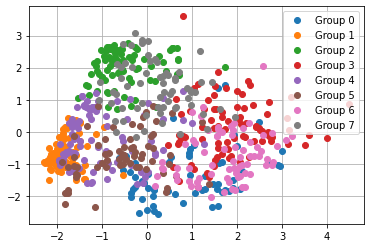

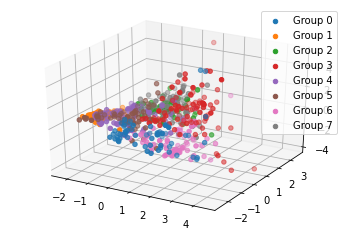

In [ ]:
pca = PCA(n_components=2)
scaler = StandardScaler()
pca_colorprofiles = scaler.fit_transform(color_profiles)
pca_colorprofiles = pca.fit_transform(pca_colorprofiles).T


for group in range(8):
  plt.plot(pca_colorprofiles[0][image_groups == group], pca_colorprofiles[1][image_groups == group],'o',label = f'Group {group}')
plt.grid()
plt.legend()
plt.show()

pca = PCA(n_components=3)
scaler = StandardScaler()
pca_colorprofiles = scaler.fit_transform(color_profiles)
pca_colorprofiles = pca.fit_transform(pca_colorprofiles).T

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for group in range(8):
  ax.scatter(pca_colorprofiles[0][image_groups == group], pca_colorprofiles[1][image_groups == group],pca_colorprofiles[2][image_groups == group],'o',label = f'Group {group}')
plt.grid()
plt.legend()
plt.show()

In [ ]:
maior = [0,1]
menor = [-1,0]
bounds = [list(l.flatten()) for l in np.array([[menor,maior,maior],[menor,menor,maior],[maior,menor,maior],[maior,maior,maior],[maior,menor,maior],[menor,menor,menor],[maior,menor,menor],[maior,maior,menor]])]
print(bounds)

[[-1, 0, 0, 1, 0, 1], [-1, 0, -1, 0, 0, 1], [0, 1, -1, 0, 0, 1], [0, 1, 0, 1, 0, 1], [0, 1, -1, 0, 0, 1], [-1, 0, -1, 0, -1, 0], [0, 1, -1, 0, -1, 0], [0, 1, 0, 1, -1, 0]]


In [ ]:
latent_vectors = dict()
for image in image_profiles:
  name = image[0]
  profile = image[1:-1].astype(int)
  group = int(image[-1])
  latent_vector = np.array([np.random.uniform(bounds[group][0],bounds[group][1]),np.random.uniform(bounds[group][2],bounds[group][3]),np.random.uniform(bounds[group][4],bounds[group][5])] + list(np.random.uniform(-1,1,97)))
  latent_vectors[name] = latent_vector

### Resizing das imagens

In [ ]:
def gray_show(image_name, folder = 'Arte resized/'):
  painting = imread(dir + folder + image_name)
  imshow(painting)

Tudo feito!


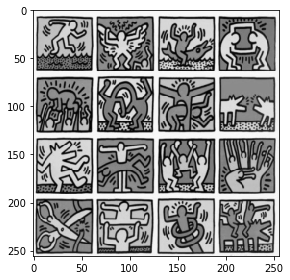

In [ ]:
for paint_name in os.listdir(dir + 'Arte'):
  if paint_name not in os.listdir(dir + 'Arte resized'):
    progress = len(os.listdir(dir + 'Arte resized'))+1
    print(f'{paint_name} ({progress}/632)')
    painting = load_img(f'{dir}Arte/{paint_name}')
    painting = img_to_array(painting)
    painting = resize(painting, (256,256,3))
    painting = rgb2gray(painting)/256
    imsave(dir + 'Arte resized/' + paint_name, painting)
print('Tudo feito!')
gray_show(paint_name)

### Modelos

In [ ]:
discriminator = Sequential([
    Conv2D(64, kernel_size=(2,2), strides=(1,1), input_shape = (256,256,1), kernel_initializer=keras.initializers.RandomNormal(stddev=0.02)),
    LeakyReLU(alpha = 0.4),
    AveragePooling2D(pool_size=(2,2)),
    Dropout(0.2),
    Conv2D(128, (2,2), kernel_initializer=keras.initializers.RandomNormal(stddev=0.2)),
    LeakyReLU(alpha = 0.4),
    AveragePooling2D(pool_size=(2,2)),
    Dropout(0.2),
    Conv2D(256, (2,2), kernel_initializer=keras.initializers.RandomNormal(stddev=0.2)),
    LeakyReLU(alpha = 0.4),
    AveragePooling2D(pool_size=(2,2)),
    Dropout(0.2),
    Flatten(),
    Dense(1, activation = 'sigmoid', kernel_initializer=keras.initializers.RandomNormal(stddev=0.2))
])

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
print(discriminator.summary())
#plot_model(discriminator, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 64)      320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 255, 255, 64)      0         
                                                                 
 average_pooling2d (AverageP  (None, 127, 127, 64)     0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 128)     32896     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 126, 126, 128)     0         
                                                        

In [ ]:
generator = Sequential([
    Dense(128*4*4, input_shape = (1,100), kernel_initializer=keras.initializers.RandomNormal(stddev=1)),
    LeakyReLU(alpha=0.2),
    Reshape((4,4,128)),
    Conv2DTranspose(128, kernel_size=(2,2), padding= 'same'),
    LeakyReLU(alpha=0.2),
    Reshape((16,16,8)),
    Conv2DTranspose(128, kernel_size=(4,4), strides=(2,2), padding= 'same'),
    LeakyReLU(alpha=0.2),
    Reshape((64,64,32)),
    Conv2DTranspose(64, kernel_size=(4,4), strides=(2,2), padding= 'same'),
    LeakyReLU(alpha=0.2),
    Reshape((256,256,16)),
    Conv2D(1,kernel_size=(2,2), strides=(1,1), padding='same', activation='sigmoid')
])

generator.compile(optimizer='adam', loss='mse')
print(generator.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1, 2048)           206848    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 1, 2048)           0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 4, 4, 128)        65664     
 nspose)                                                         
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 4, 4, 128)         0         
                                                                 
 reshape_1 (Reshape)         (None, 16, 16, 8)         0         
                                                      

In [ ]:
paintings = []
for painting_name in os.listdir(dir + 'Arte resized/'):
  try:
    painting = imread(dir + f'Arte resized/{painting_name}').reshape((256,256,1))
    paintings.append(painting)
  except:
    pass
paintings = np.array(paintings)/255

In [ ]:
def train_discriminator(dataset, n_iter=100, n_batch=16, verbose = True):
  discriminator.trainable = True
  if verbose:
    print('Treinar o discriminador')
  for i in range(n_iter):
    if verbose:
      print(f'Época {i+1}/{n_iter}', end = ' ')
      tempo = time.perf_counter()
    reals = dataset[np.random.choice(range(len(dataset)), n_batch)]
    _, true_acc = discriminator.train_on_batch(reals, np.ones((n_batch,1)))
    fakes = np.array([(generator.predict(np.random.uniform(-1,1,(1,1,100)))).reshape(256,256,1) for j in range(n_batch)])
    _, false_acc = discriminator.train_on_batch(fakes, np.zeros((n_batch,1)))
    if verbose:
      print(f'({true_acc*100}% true accuracy, {false_acc*100}% false accuracy) ({time.perf_counter() - tempo:.2f}s)')
  discriminator.trainable = False

In [ ]:
discriminator.trainable = False
gan = Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer='adam')
print(gan.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 1)       321921    
                                                                 
 sequential (Sequential)     (None, 1)                 410561    
                                                                 
Total params: 732,482
Trainable params: 321,921
Non-trainable params: 410,561
_________________________________________________________________
None


In [ ]:
def train_gan(gan_model, n_iter=100, n_batch=16):
  for i in range(n_iter):
    tempo = time.perf_counter()
    print(f'Época {i+1}/{n_iter}', end = ' ')
    x_gan = np.random.uniform(-1,1,(n_batch,1,100))
    y_gan = np.ones((n_batch, 1))
    acc = gan_model.train_on_batch(x_gan, y_gan)
    print(f'({acc*100} loss) ({time.perf_counter() - tempo:.2f}s)')

def train(dataset, n_epochs=100, n_batch=16):
  tempo0 = time.perf_counter()
  bat_per_epo = round(dataset.shape[0] / n_batch)
  half_batch = n_batch // 2
  for i in range(n_epochs):
    tempo = time.perf_counter()
    print(f'Época {i+1}/{n_epochs}')
    for j in range(bat_per_epo):
      train_discriminator(paintings, n_iter = 1, n_batch = half_batch, verbose=False)
      g_loss = gan.train_on_batch(np.random.uniform(-1,1,(n_batch,1, 100)), ones((n_batch, 1)))
      print('> Época %d/%d, batch %d/%d, g=%.3f' % (i+1, n_epochs, j+1, bat_per_epo, g_loss))
    print(f'Fim de época {i+1}/{n_epochs}, demorou {time.perf_counter() - tempo:.2f}s')
  print(f'Fim de treino, demorou {round((time.perf_counter()-tempo0)/60)}min')

In [ ]:
train(paintings, 250)

Época 1/250


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


A saída de streaming foi truncada nas últimas 5000 linhas.
> Época 129/250, batch 3/39, g=1969.840
> Época 129/250, batch 4/39, g=1957.891
> Época 129/250, batch 5/39, g=1961.795
> Época 129/250, batch 6/39, g=1969.604
> Época 129/250, batch 7/39, g=1955.781
> Época 129/250, batch 8/39, g=1962.698
> Época 129/250, batch 9/39, g=1967.208
> Época 129/250, batch 10/39, g=1967.838
> Época 129/250, batch 11/39, g=1954.991
> Época 129/250, batch 12/39, g=1959.209
> Época 129/250, batch 13/39, g=1958.124
> Época 129/250, batch 14/39, g=1963.058
> Época 129/250, batch 15/39, g=1977.321
> Época 129/250, batch 16/39, g=1971.588
> Época 129/250, batch 17/39, g=1981.280
> Época 129/250, batch 18/39, g=1973.298
> Época 129/250, batch 19/39, g=1965.458
> Época 129/250, batch 20/39, g=1962.827
> Época 129/250, batch 21/39, g=1960.150
> Época 129/250, batch 22/39, g=1965.368
> Época 129/250, batch 23/39, g=1973.126
> Época 129/250, batch 24/39, g=1958.619
> Época 129/250, batch 25/39, g=1971.509
> Épo

In [ ]:
discriminator.save(dir + 'discriminator.h5')
generator.save(dir + 'generator.h5')
gan.save(dir + 'gan.h5')

In [ ]:
painting2.shape

NameError: ignored

In [ ]:
discriminator = keras.models.load_model(dir + 'discriminator.h5')
generator = keras.models.load_model(dir + 'generator.h5')
gan = keras.models.load_model(dir + 'gan.h5')

In [ ]:
painting1 = generator.predict(np.random.uniform(-1,1,(1,1,100)))
painting2 = paintings[np.random.choice(range(len(paintings)))]
print(discriminator.predict(painting1)[0,0])
plt.figure()
plt.subplot(121)
imshow(painting1.reshape(256,256),cmap=plt.cm.gray)
print(discriminator.predict(painting2.reshape(1,256,256,1))[0,0])
plt.subplot(122)
imshow(painting2.reshape(256,256),cmap=plt.cm.gray)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


0.0
1.0
